<a href="https://colab.research.google.com/github/auriwan/Recommendation-system/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anime Recommendation System

Auriwan Yasper

Dataset Anime: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database?select=anime.csv

Dataset Rating: https://www.kaggle.com/datasets/marlesson/myanimelist-dataset-animes-profiles-reviews

# Pendahuluan

Tema dari analisis ini adalah hiburan dimana hasilnya akan berupa model machine learning yang nanti dapat digunakan untuk dijadikan sebuah sistem rekomendasi anime

# Data Loading

**Import Library**

In [1]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import drive

In [ ]:
!pip install -q kaggle

In [4]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/"

In [7]:
!chmod 600 /content/gdrive/MyDrive/kaggle.json

**Download Dataset Anime**

In [8]:
! KAGGLE_CONFIG_DIR=/content/gdrive/MyDrive kaggle datasets download -d hernan4444/anime-recommendation-database-2020

100% 661M/661M [00:03<00:00, 249MB/s]
100% 661M/661M [00:03<00:00, 211MB/s]


Download Dataset Rating

In [9]:
! KAGGLE_CONFIG_DIR=/content/gdrive/MyDrive kaggle datasets download -d marlesson/myanimelist-dataset-animes-profiles-reviews

 93% 201M/217M [00:01<00:00, 217MB/s]
100% 217M/217M [00:01<00:00, 160MB/s]


**Ekstrak Dataset Anime**

In [10]:
file = '/content/anime-recommendation-database-2020.zip'
zip_ref = zipfile.ZipFile(file, 'r')
zip_ref.extractall('/dataset_baru/')
zip_ref.close()

**Extrak dataset Rating**

In [11]:
file = '/content/myanimelist-dataset-animes-profiles-reviews.zip'
zip_ref = zipfile.ZipFile(file, 'r')
zip_ref.extractall('/dataset_baru/')
zip_ref.close()



# **Content-Based-Filtering**



# **Data Understanding**

dataset ini bersumber dari kaggle dataset dengan 2 sumber dataset, dataset pertama akan digunakan untuk dataset anime dan dataset kedua digunakan untuk dataset rating

**Membuat data frame anime dan rating**

dan kita tampilkan 5 data pertama anime dan rating

In [12]:
df_anime = pd.read_csv('/dataset_baru/anime.csv')
df_anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


# Exploratory Data Analysis



**Univariate Analysis**

**Deskripsi Variable**

- Variable yang akan digunakan pada anime.csv
  - MAL_ID = ID dari anime
  - name = Judul Anime
  - genre = Genre dari anime
  - score = Rating Anime


In [13]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

Selanjutnya memilih column yang diperlukan

In [14]:
df_anime = df_anime[['MAL_ID', 'Genres', 'Name', 'Rating']]

Selanjutnya kita akan melihat data genre yang terdapat pada dataset anime sebagai berikut

In [15]:
anime_genre = df_anime.copy()
genres=[]
for i in range(len(df_anime.Genres)):
    for x in df_anime.Genres[i].split(', '):
        if x not in genres:
            genres.append(x)
genres

['Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Sci-Fi',
 'Space',
 'Mystery',
 'Shounen',
 'Police',
 'Supernatural',
 'Magic',
 'Fantasy',
 'Sports',
 'Josei',
 'Romance',
 'Slice of Life',
 'Cars',
 'Seinen',
 'Horror',
 'Psychological',
 'Thriller',
 'Super Power',
 'Martial Arts',
 'School',
 'Ecchi',
 'Vampire',
 'Military',
 'Historical',
 'Dementia',
 'Mecha',
 'Demons',
 'Samurai',
 'Game',
 'Shoujo',
 'Harem',
 'Music',
 'Shoujo Ai',
 'Shounen Ai',
 'Kids',
 'Hentai',
 'Parody',
 'Yuri',
 'Yaoi',
 'Unknown']

In [16]:
print("Genres amount : {}".format(len(genres)))

Genres amount : 44


Jadi pada dataset terdapat 44 genre yang tersedia, dan kita akan membuat visualisasinya sebagai berikut

Lalu kita akan membuat genre menjadi satu kolom dalam dataset

In [17]:
for x in genres:
    anime_genre[x] = 0

for i in range(len(df_anime.Genres)):
    for x in df_anime.Genres[i].split(', '):
        anime_genre[x][i]=1

anime_genre.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MAL_ID,Genres,Name,Rating,Action,Adventure,Comedy,Drama,Sci-Fi,Space,...,Harem,Music,Shoujo Ai,Shounen Ai,Kids,Hentai,Parody,Yuri,Yaoi,Unknown
0,1,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,R - 17+ (violence & profanity),1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop: Tengoku no Tobira,R - 17+ (violence & profanity),1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,6,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,PG-13 - Teens 13 or older,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,7,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,PG-13 - Teens 13 or older,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,"Adventure, Fantasy, Shounen, Supernatural",Bouken Ou Beet,PG - Children,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Selanjutnya kita akan menampilkan data sebaran genre anime

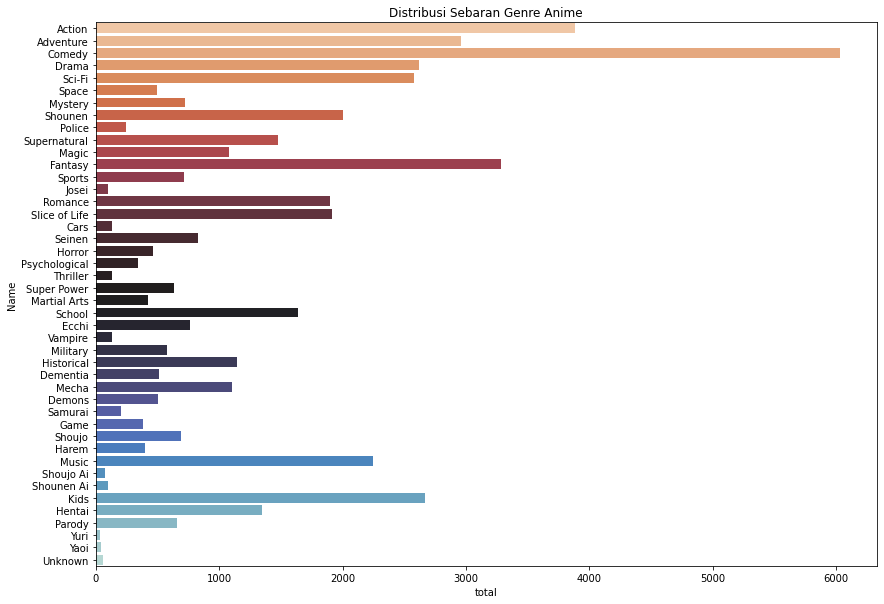

In [18]:
data = anime_genre.iloc[:,4:].sum().reset_index()
data.columns = ['Name','total']

plt.figure(figsize=(14,10))
sns.barplot(y='Name', x='total', data=data, palette='icefire_r')
plt.title('Distribusi Sebaran Genre Anime')
plt.show()

# Data Preparation

**Mengecek Missing Value**

In [19]:
df_anime.isnull().sum()

MAL_ID    0
Genres    0
Name      0
Rating    0
dtype: int64

tidak ada data missing value pada datase

untuk dataset rating tidak terdapat missing value

In [20]:
df_anime.isnull().sum()

MAL_ID    0
Genres    0
Name      0
Rating    0
dtype: int64

**Mengecek data Duplikat**

In [21]:
df_anime.duplicated().sum()

0

# Model Development

pertama kita akan mempersiapkan data untuk cosine similarity dengan TfidfVectorizer, lalu mendapatkan fiur penting pada data genre 

In [22]:
tfid = TfidfVectorizer(stop_words='english')
tfid.fit(df_anime['Genres'])
tfid.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'music',
 'mystery',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'unknown',
 'vampire',
 'yaoi',
 'yuri']

selanjutnya kita akan melakukan fitting dan mengubah kedalam bentuk matriks

In [23]:
tfidf_matrix = tfid.fit_transform(df_anime['Genres']) 
tfidf_matrix.shape

(17562, 47)

angka diatas adalah ukuran dari matriks kita, dan untuk melihat vektor tf-idf dalam bentuk matriks kita jalankan kode berikut

In [24]:
cosine_sim = cosine_similarity(tfidf_matrix)
print(cosine_sim.shape)
cosine_sim

(17562, 17562)


array([[1.        , 0.78149159, 0.74413675, ..., 0.        , 0.26144077,
        0.21333391],
       [0.78149159, 1.        , 0.51816708, ..., 0.18292702, 0.        ,
        0.2048185 ],
       [0.74413675, 0.51816708, 1.        , ..., 0.        , 0.28731405,
        0.23444634],
       ...,
       [0.        , 0.18292702, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.26144077, 0.        , 0.28731405, ..., 0.        , 1.        ,
        0.        ],
       [0.21333391, 0.2048185 , 0.23444634, ..., 0.        , 0.        ,
        1.        ]])

dari matriks tf-idf diatas kita lihat bagaimana similarity dari dataset anime yang kita miliki

In [25]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_anime['Name'],
                             columns=df_anime['Name'])
print('Size dataframe:', cosine_sim_df.shape)
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Size dataframe: (17562, 17562)


Name,Oshiri Kajiri Mushi,Atagoal wa Neko no Mori,Ichiban Kirei na Hoshi,Hwanggeum Nalgae 1.2.3.,Eien no Aselia,Watt Poe to Bokura no Ohanashi,Tenchi Muyou!,Konchuu Monogatari Minashigo Hutch,Osu,Shousei Shikisai Gensou
Name,,,,,,,,,,
Hong Mao Lan Tu: Kuaile Shizi,0.615813,1.000000,0.686368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sukeban Shoukai Cutie Lemon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Enbo,0.000000,0.000000,0.000000,0.000000,0.379397,0.000000,0.000000,0.405249,0.000000,0.000000
Spy Penguin (ONA): White Christmas,0.000000,0.000000,0.000000,0.000000,0.799218,0.402881,0.000000,0.443282,0.000000,0.000000
Amazing Nuts!,0.234829,0.000000,0.261734,0.327021,0.188568,0.585634,0.349611,0.201417,0.000000,0.359893
Alphard x Taka no Tsume,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kumo ga Haretara,0.897206,0.686368,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.727255
Kamiusagi Rope 2,0.182863,0.000000,0.000000,0.000000,0.000000,0.000000,0.092841,0.189495,0.910240,0.000000
Puchimas!: Petit iDOLM@STER (OVA),0.350037,0.000000,0.267575,0.000000,0.000000,0.000000,0.055831,0.113955,0.547384,0.367925


# Model

selanjutnya kita akan membuat fungsi untuk merekomendasikan 10 anime berdasarkan similaritynya 

In [26]:
def AnimeRecommendations(anime_name, similarity_data=cosine_sim_df, 
                         items=df_anime[['MAL_ID','Name','Genres']], k=10):
  
    ''' Mengambil data menggunakan argpartition untuk partisi secara tidak langsung,
    sepanjang sumbu yang diberikan, kemudian dataframe diubah menjadi numpy Range 
    dengan parameter sebagai berikut (start, stop, step) '''
    index = similarity_data.loc[:, anime_name].to_numpy().argpartition(
        range(-1, -k, -1)
    )
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(anime_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

selanjutnya kita akan menyalin data tersendiri untuk conten base filtering dengan nama variabel df_anime_cbf, ini akan kita gunakan pada pengujian di evaluasi

In [27]:
df_anime_cbf = df_anime.copy()

# **Collaborative Filtering**

# **Data Loading**

In [28]:
df_rating = pd.read_csv('/dataset_baru/reviews.csv')

pertama kita perlu menggabungkan data anime dan rating terlebih dahulu, dan menyamakan variabel yang akan kita gabungkan

In [29]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        192112 non-null  int64 
 1   profile    192112 non-null  object
 2   anime_uid  192112 non-null  int64 
 3   text       192112 non-null  object
 4   score      192112 non-null  int64 
 5   scores     192112 non-null  object
 6   link       192112 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.3+ MB


Memilih column Dataset rating yang diperlukan

In [31]:
df_anime.columns = ['anime_id', 'genre', 'name', 'Rating']
df_anime.head()

,anime_id,genre,name,Rating
0,1,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,R - 17+ (violence & profanity)
1,5,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop: Tengoku no Tobira,R - 17+ (violence & profanity)
2,6,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,PG-13 - Teens 13 or older
3,7,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,PG-13 - Teens 13 or older
4,8,"Adventure, Fantasy, Shounen, Supernatural",Bouken Ou Beet,PG - Children


In [32]:
df_rating.columns = ['user_id', 'anime_id', 'rating']
df_rating.head()

,user_id,anime_id,rating
0,255938,34096,8
1,259117,34599,10
2,253664,28891,7
3,8254,2904,9
4,291149,4181,10


In [33]:
rating_anime = pd.merge(df_rating, df_anime, on='anime_id', how='inner')
rating_anime.drop(['Rating'],axis=1, inplace=True)
rating_anime.head()

,user_id,anime_id,rating,genre,name
0,255938,34096,8,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.
1,249891,34096,8,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.
2,313501,34096,8,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.
3,317041,34096,8,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.
4,245369,34096,7,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.


# **Data Understanding**


- Variable pada file users_cleaned.csv
  - uid = id dari user 
  - anime_uid
  - score = rating yang diberikan user

**Visualisasi sebaran 10 anime dengan rating tertinggi**

In [34]:
df_rating.head()

,user_id,anime_id,rating
0,255938,34096,8
1,259117,34599,10
2,253664,28891,7
3,8254,2904,9
4,291149,4181,10


In [35]:
rating_anime_count = rating_anime.groupby('name')['rating'].count()
rating_anime_count = pd.DataFrame(rating_anime_count).reset_index().rename(columns={'rating':'total_rating'})
rating_anime_count.head()

,name,total_rating
0,"""0""",3
1,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",2
2,"""Bungaku Shoujo"" Memoire",3
3,"""Bungaku Shoujo"" Movie",28
4,"""Calpis"" Hakkou Monogatari",2


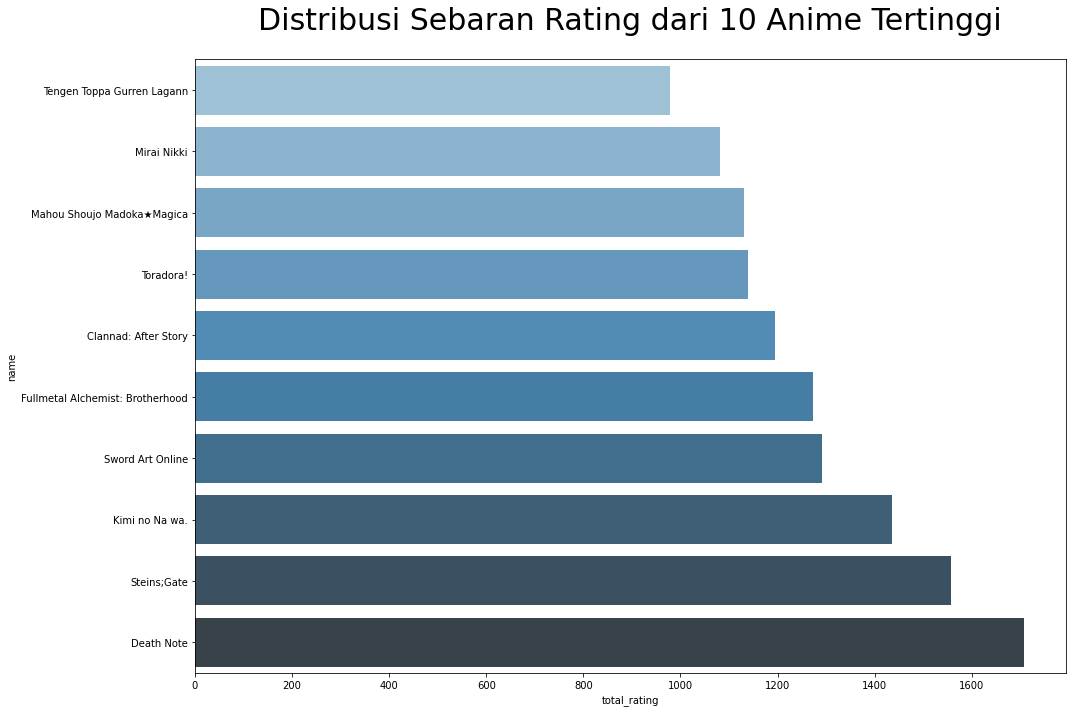

In [36]:
data = rating_anime_count.sort_values(by ='total_rating')

plt.figure(figsize=(15,10))
sns.barplot(data=data.iloc[-10:,:], 
            y='name', x='total_rating',
            palette="Blues_d")
plt.title('Distribusi Sebaran Rating dari 10 Anime Tertinggi', pad=30, fontsize=30)
plt.tight_layout()
plt.show()

dari data diatas bisa kita lihat anime dengan rating tertinggi dipegang oleh Sword art online

# **Data preparation**

Pada data preparation ini kita akan mengambil data rating_anime yang merupakan data gabungan dan menyimpannya pada variabel merge_df.

In [37]:
merge_df = rating_anime
merge_df.head()

,user_id,anime_id,rating,genre,name
0,255938,34096,8,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.
1,249891,34096,8,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.
2,313501,34096,8,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.
3,317041,34096,8,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.
4,245369,34096,7,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.


kita lakukan pengecekan null dan duplikasi

In [38]:
merge_df.isnull().sum()

user_id     0
anime_id    0
rating      0
genre       0
name        0
dtype: int64

In [39]:
merge_df.duplicated().sum()

61584

In [40]:
df_rating.drop_duplicates(subset=['user_id','anime_id'], keep='first', inplace=True)
df_rating.duplicated().sum()

0

pada tahap selanjuntnya kita akan mengubah unique user_id dan anime_id menjadi list, lalu melakukan encoding user_id dan encoding anime_id, dan encoding angka ke user_id dan anime

In [41]:
user_id = merge_df['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}

In [42]:
anime_id = merge_df['anime_id'].unique().tolist()
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_id)}
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_id)}

Selanjutnya kita melakukan mapping data user id dan anime id

In [43]:
merge_df['user'] = merge_df['user_id'].map(user_to_user_encoded)
merge_df['anime'] = merge_df['anime_id'].map(anime_to_anime_encoded)
merge_df.head()

,user_id,anime_id,rating,genre,name,user,anime
0,255938,34096,8,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.,0,0
1,249891,34096,8,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.,1,0
2,313501,34096,8,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.,2,0
3,317041,34096,8,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.,3,0
4,245369,34096,7,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama.,4,0


selanjutnya kita akan mendapatkan jumlah user dan anime, lalu merubah tipe data variabel rating menjadi float, lalu melihat nilai maksimum dan nilai minimum pada rating

In [44]:
num_users = len(user_to_user_encoded)
num_anime = len(anime_encoded_to_anime)
merge_df['rating'] = merge_df['rating'].values.astype(np.float32)
min_rating = min(merge_df['rating'])
max_rating = max(merge_df['rating'])

print(f'Number of User: {num_users}')
print(f'Number of anime: {num_anime}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')

Number of User: 130488
Number of anime: 8107
Min rating: 0.0
Max rating: 11.0


# **Pembagian dataset training dan test**

sebelum kita masuk pembagian dataset kita akan melakukan acak dataset

In [45]:
df = merge_df.sample(frac=1, random_state=30)
df.head()

,user_id,anime_id,rating,genre,name,user,anime
151268,230218,30749,7.0,"Action, Harem, Supernatural, Romance, Ecchi, F...",Saijaku Muhai no Bahamut,89684,4331
108398,170171,22265,9.0,"Slice of Life, Comedy, Sports, Drama, School",Free!: Eternal Summer,54207,938
163687,269331,1617,10.0,"Comedy, Josei, Romance, Slice of Life",Massugu ni Ikou.,102103,5654
52803,226281,1033,8.0,"Action, Adventure, Drama, Fantasy, Historical,...",Sennen Joyuu,26403,502
117436,125311,1042,1.0,"Drama, Music, Romance, Sports, Yaoi",Bronze: Zetsuai Since 1989,58352,1286


Tahap selanjutnya kita akan membuat sebuat variabel x yang akan menampung data user dan anime, dan variabel y untuk menampung data rating. selanjutnya kita akan membagi dataset sebanyak 80% data train dan 20% data test

In [46]:
x = merge_df[['user', 'anime']].values
y = merge_df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
train_indices = int(0.8 * merge_df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

# **Melatih model**

pertama kita akan membuat class dan fungsi inisialisasi

In [47]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(5e-7)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.anime_embedding = layers.Embedding(
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(5e-7)
    )
    self.anime_bias = layers.Embedding(num_anime, 1)
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    anime_vector = self.anime_embedding(inputs[:, 1])
    anime_bias = self.anime_bias(inputs[:, 1])
 
    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2) 
 
    x = dot_user_anime + user_bias + anime_bias
    
    return tf.nn.sigmoid(x)

**Compile Model dan membuat callback**

In [48]:
model = RecommenderNet(num_users, num_anime, 50) # inisialisasi model

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()]]
)
callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=7,
    restore_best_weights=True,
)

In [49]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/100
19208/19208 [==============================] - 149s 8ms/step - loss: 0.6116 - mean_absolute_error: 0.1708 - root_mean_squared_error: 0.2074 - val_loss: 0.6946 - val_mean_absolute_error: 0.2056 - val_root_mean_squared_error: 0.2381
Epoch 2/100
19208/19208 [==============================] - 144s 7ms/step - loss: 0.5822 - mean_absolute_error: 0.1342 - root_mean_squared_error: 0.1726 - val_loss: 0.6943 - val_mean_absolute_error: 0.2056 - val_root_mean_squared_error: 0.2381
Epoch 3/100
19208/19208 [==============================] - 143s 7ms/step - loss: 0.5722 - mean_absolute_error: 0.1203 - root_mean_squared_error: 0.1605 - val_loss: 0.6941 - val_mean_absolute_error: 0.2056 - val_root_mean_squared_error: 0.2381
Epoch 4/100
19208/19208 [==============================] - 143s 7ms/step - loss: 0.5650 - mean_absolute_error: 0.1093 - root_mean_squared_error: 0.1512 - val_loss: 0.6940 - val_mean_absolute_error: 0.2056 - val_root_mean_squared_error: 0.2381
Epoch 5/100
19208/19208 [===

Selanjutnya kita akan menguji dengan salah satu sampel user dan menguji rekomendasi dengan model yang sudah kita rancang

In [50]:
user_id = merge_df.user_id.sample(1).iloc[0]
anime_watched_by_user = merge_df[merge_df.user_id == user_id]
 
anime_not_watched = df_anime[~df_anime['anime_id'].isin(anime_watched_by_user.anime_id.values)]['anime_id'] 
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(anime_to_anime_encoded.keys()))
)

 
anime_not_watched = [[anime_to_anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

In [51]:
ratings = model.predict(user_anime_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('====' * 10)
print('movie with high ratings from user')
print('----' * 8)
 
top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)
 
anime_df_rows = df_anime[df_anime['anime_id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.name)
 
print('----' * 8)
print('Top 10 anime recommendation')
print('----' * 8)
 
recommended_anime = df_anime[df_anime['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.name)

Showing recommendations for users: 223061
movie with high ratings from user
--------------------------------
Orangutan
--------------------------------
Top 10 anime recommendation
--------------------------------
Hunter x Hunter: Original Video Animation
Akachan to Boku
Flanders no Inu (Movie)
Gekitou! Crush Gear Turbo
Pokemon Black and White 2: Introduction Movie
Tamayura: Sotsugyou Shashin Part 4 - Ashita
Kuroko no Basket: Saikou no Present Desu
Schick x Evangelion
Natsume Yuujinchou Roku
Yuri!!! on Ice: Yuri Plisetsky GPF in Barcelona EX - Welcome to The Madness


# Evaluation

Pada tahap ini penulis menggunakan dua teknik yaitu :

- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)

Dan untuk Sistem Rekomendasi Content Based Filtering Saya menggunakan Precision

# Plot Grafik MAE

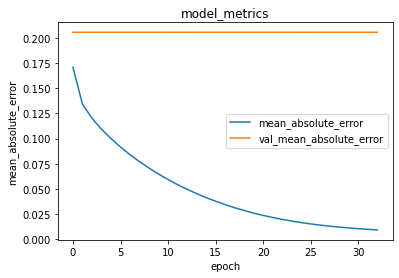

In [52]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model_metrics')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['mean_absolute_error', 'val_mean_absolute_error'])
plt.show()

# Plot Grafik RMSE

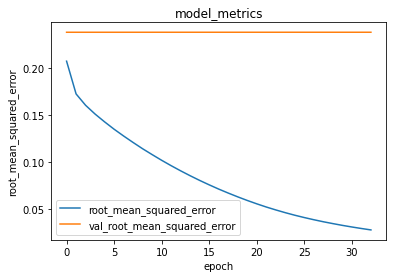

In [53]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['root_mean_squared_error', 'val_root_mean_squared_error'])
plt.show()

# Precision

In [54]:
find_name = df_anime_cbf[df_anime_cbf['Name'] == 'Cowboy Bebop']
find_name

,MAL_ID,Genres,Name,Rating
0,1,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,R - 17+ (violence & profanity)


In [55]:
anime_name = 'Cowboy Bebop'
anime_recomend = AnimeRecommendations(anime_name)
anime_recomend

,Name,MAL_ID,Genres
0,Cowboy Bebop: Yose Atsume Blues,4037,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,Ginga Tetsudou Monogatari,1490,"Action, Adventure, Drama, Sci-Fi, Space"
2,Uchuu Kaizoku Captain Herlock: Arcadia-gou no ...,2470,"Action, Sci-Fi, Adventure, Space, Drama"
3,Waga Seishun no Arcadia: Mugen Kidou SSX,2203,"Action, Adventure, Drama, Sci-Fi, Space"
4,Waga Seishun no Arcadia,2202,"Action, Adventure, Drama, Sci-Fi, Space"
5,Odin: Koushi Hansen Starlight,1287,"Action, Sci-Fi, Adventure, Space, Drama"
6,Ginga Tetsudou Monogatari: Eien e no Bunkiten,2717,"Action, Adventure, Space, Drama, Sci-Fi"
7,Seihou Bukyou Outlaw Star,400,"Action, Sci-Fi, Adventure, Space, Comedy"
8,Ginga Tetsudou 999 (ONA),28733,"Sci-Fi, Adventure, Space, Drama"
9,Sayonara Ginga Tetsudou 999: Andromeda Shuucha...,1302,"Sci-Fi, Adventure, Space, Drama"


Data referensi kita yaitu Cowboy Bebop memiliki 6 genre yaitu Action, adventure, Comedy, Drama, Sci-fi, dan Space. 
Lalu hasil rekomendasi yang relevan hanya 1 yang sama persis memiliki 6 genre yaitu anime dengan judul yang sama juga yaitu Cowboy Bebop: Yose Atsuma Blues. Akan tetapi terdapat 7 anime dengan genre yang sama sebanyak 5 genre, sehingga data ini juga relevan dengan anime referensi yang kita gunakan. Jadi Presisi sistem kita sebesar 8/10 atau 80%.